<a href="https://colab.research.google.com/github/MohibUllahKhanSherwani/ml_projects/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [63]:
#load the dataset to a pandas dataframe
wine_dataframe = pd.read_csv('/content/winequality-red.csv')
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
wine_dataframe.shape

(1599, 12)

In [65]:
wine_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [66]:
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [67]:
#check for missing values
wine_dataframe.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


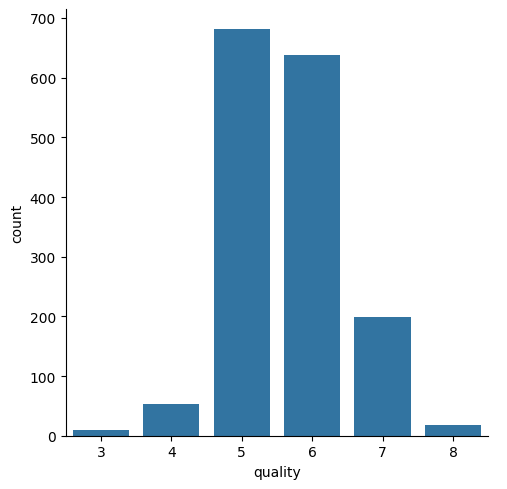

In [68]:
# number of values for each quality
sns.catplot(x = 'quality', data = wine_dataframe, kind = 'count')

<ipython-input-69-6ed6ea4afe91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataframe


<Axes: xlabel='quality', ylabel='volatile acidity'>

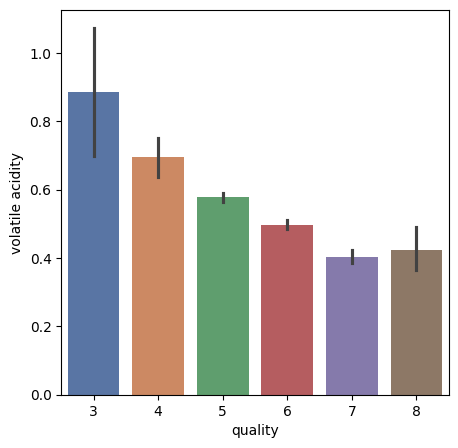

In [69]:
#check for relationships between different attributes and the quality attribute
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataframe
            , palette = 'deep')

Higher the volatile acidity, lower is the quality


<ipython-input-70-b2bf237d9cd1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataframe


<Axes: xlabel='quality', ylabel='citric acid'>

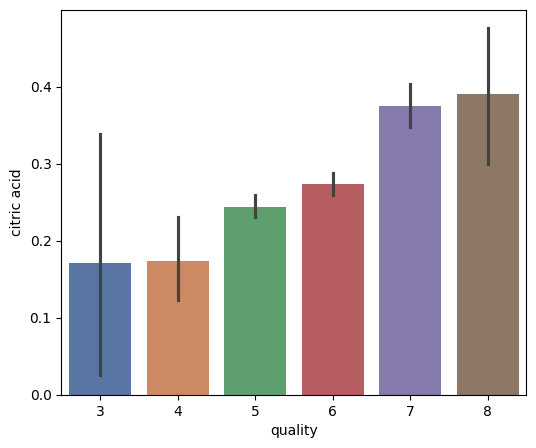

In [70]:
plot = plt.figure(figsize = ((6,5)))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataframe
            , palette = 'deep')

Lower the citric acid, higher is the quality

<ipython-input-71-4c32a9de889a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'residual sugar', data = wine_dataframe


<Axes: xlabel='quality', ylabel='residual sugar'>

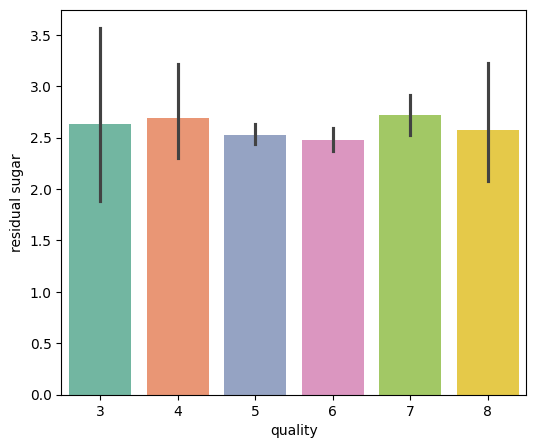

In [71]:
plot = plt.figure(figsize = ((6,5)))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_dataframe
            , palette = 'Set2')

In [72]:
#correlation of data
correlation = wine_dataframe.corr()

<Axes: >

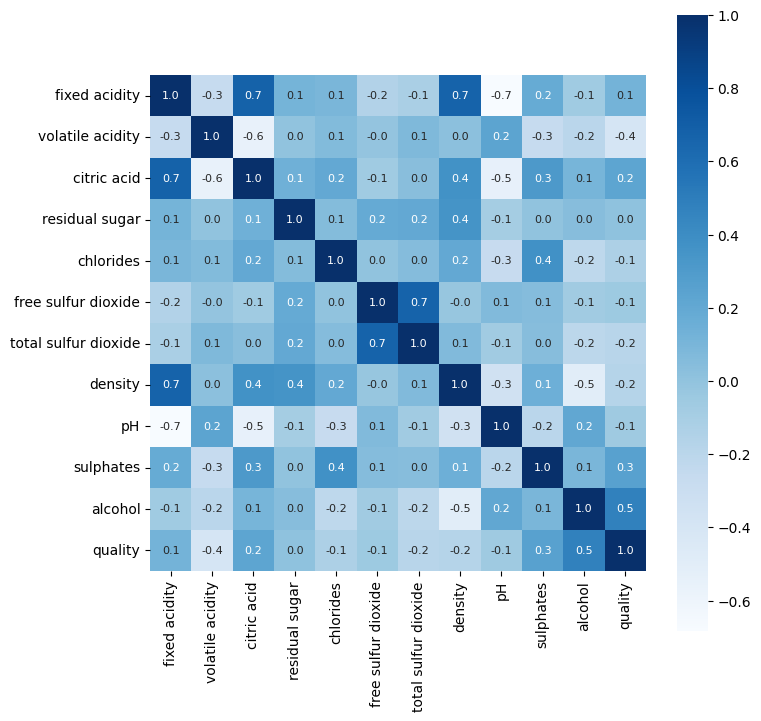

In [73]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f',
            annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

Seperate data and label



In [74]:
x = wine_dataframe.drop('quality', axis = 1)
#label binarization --> wine quality >= 7 GOOD (1)
#                       wine quality < 7 BAD (0)
y = wine_dataframe['quality'].apply(lambda val: 1 if val >= 7 else 0)

In [75]:
print(x)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [76]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [77]:
y.value_counts()

,count
quality,
0,1382
1,217


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 3,
                                                    stratify = y
                                                    )

In [79]:
print(x.shape, x_train.shape, x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [80]:
#Model training
model = RandomForestClassifier()

In [81]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
#Evaluate the accuracy
training_data_prediction = model.predict(x_train)
training_accuracy = accuracy_score(training_data_prediction, y_train)
print(training_accuracy)

1.0


In [83]:
test_data_prediction = model.predict(x_test)
test_accuracy = accuracy_score(test_data_prediction, y_test)
print(test_accuracy)

0.90625


In [88]:
print(y_test.value_counts() / len(y_test)) #checking if data was evenly
                                            #distributed

quality
0    0.865625
1    0.134375
Name: count, dtype: float64


In [89]:
print(y_train.value_counts() / len(y_train))

quality
0    0.863956
1    0.136044
Name: count, dtype: float64


Predictive System

In [93]:
input_data = (7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4)
arr = np.asarray(input_data)
arr = arr.reshape(1, -1)
prediction = model.predict(arr)
print(prediction)
if prediction[0] == 0:
  print('Bad Quality Wine')
else:
  print('Good Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
